In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
X_train = []
Y_train = []
image_size = 150
labels = {0: 'no_tumor', 1: 'pituitary_tumor'}

for label, class_name in labels.items():
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training', class_name)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        '''for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)'''
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [4]:
np.unique(Y_train)

array([0, 1])

In [5]:
pd.Series(Y_train).value_counts()

1    827
0    395
Name: count, dtype: int64

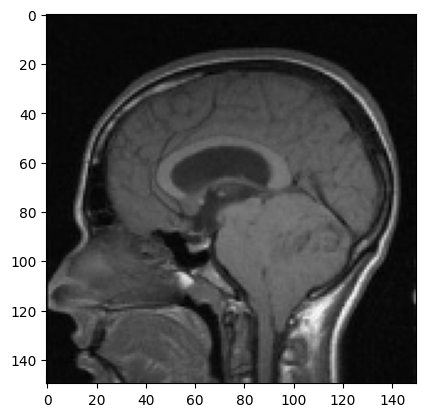

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
X_updated = X_train.reshape(len(X_train), -1)
X_updated.shape

(1222, 67500)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y_train, random_state=10,
                                               test_size=.20)

In [9]:
xtrain.shape, xtest.shape

((977, 67500), (245, 67500))

In [10]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [11]:
from sklearn.decomposition import PCA

In [12]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 67500) (245, 67500)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
history=lg.fit(pca_train, ytrain)

In [15]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [16]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9714285714285714


In [17]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9673469387755103


In [18]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  3,  57,  60, 138, 159, 207, 220, 225]),)

In [19]:
pred[3]

1

In [20]:
ytest[3]

0

In [21]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

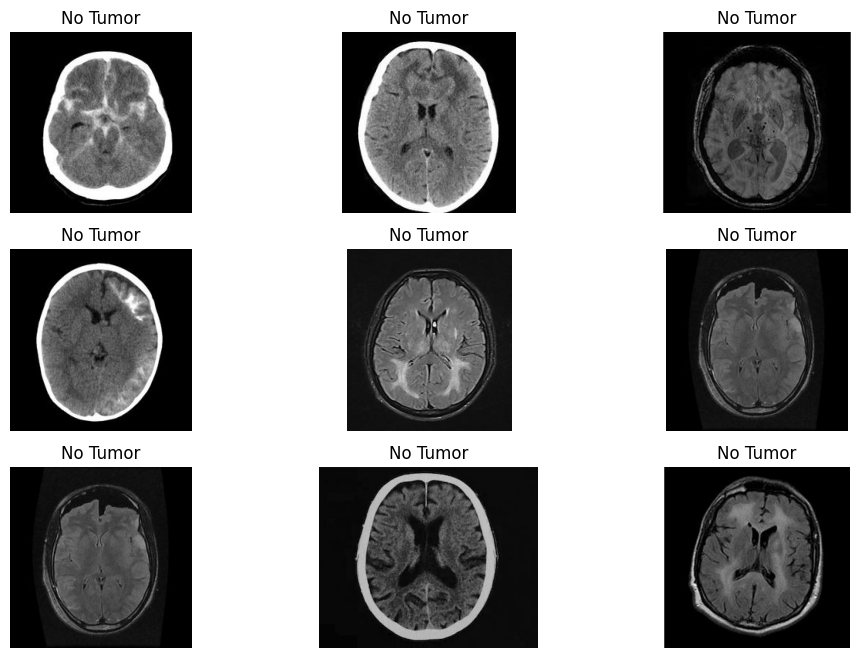

In [22]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'sv' is your machine learning model and 'dec' is a dictionary mapping class labels to their names.
image_size = 150

plt.figure(figsize=(12, 8))
c = 1

# Iterate through the images in the 'no_tumor' directory
for j in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread(os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor', j))
    
    # Check if the image was loaded successfully
    if img is not None:
        img_array = cv2.resize(img, (image_size, image_size))
        img_array = img_array.reshape(1,-1)/255  # Reshape to match model input
        
        p = sv.predict(img_array)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    else:
        print(f"Failed to load image: {j}")

    c += 1

plt.show()


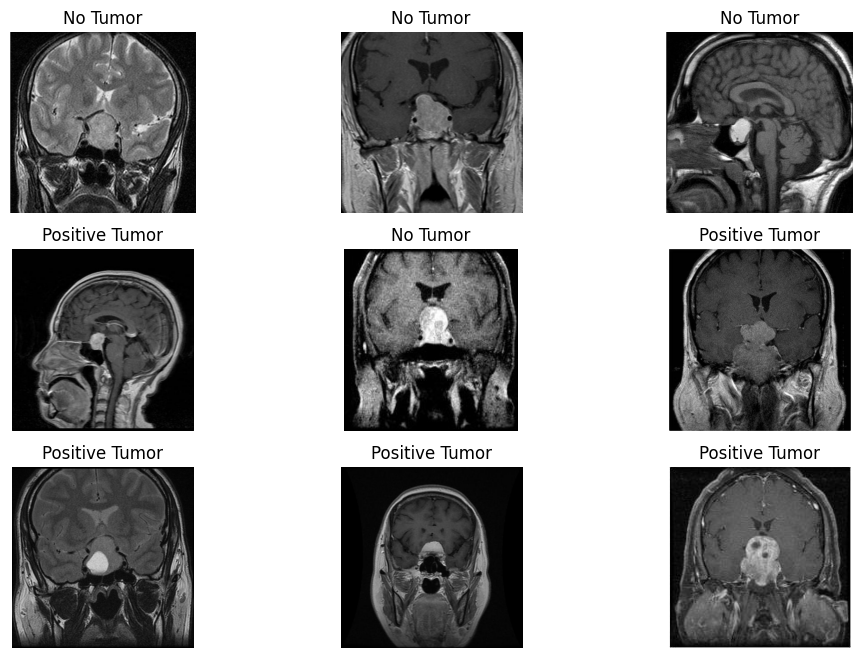

In [23]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'sv' is your machine learning model and 'dec' is a dictionary mapping class labels to their names.
image_size = 150

plt.figure(figsize=(12, 8))
c = 1

# Iterate through the images in the 'no_tumor' directory
for j in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread(os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor', j))
    
    # Check if the image was loaded successfully
    if img is not None:
        img_array = cv2.resize(img, (image_size, image_size))
        img_array = img_array.reshape(1, -1) / 255.0  # Reshape and normalize the image
        
        p = sv.predict(img_array)
        class_name = dec[p[0]]  # Get the class name based on the predicted label
        plt.title(class_name)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    else:
        print(f"Failed to load image: {j}")

    c += 1

plt.show()
